In [1]:
import datasets 
import numpy as np 
from transformers import BertTokenizerFast 
from transformers import DataCollatorForTokenClassification 
from transformers import AutoModelForTokenClassification 
from sklearn.model_selection import train_test_split
from datasets import Dataset
import random
import warnings
warnings.filterwarnings('ignore')

# https://github.com/rohan-paul/MachineLearning-DeepLearning-Code-for-my-YouTube-Channel/blob/master/NLP/YT_Fine_tuning_BERT_NER_v1.ipynb

/Users/julianbehrendt/opt/anaconda3/envs/computational_semantics/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-02-01 10:50:47.128175: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# This code block reads the data.txt file and outputs a list of lists with the tokens and
# a list of list of the semantic tags

full_sen = []
with open('train.nl.txt') as fh:
    # Skip initial comments that starts with #
    while True:
        line = fh.readline()
        # break while statement if it is not a comment line
        # i.e. does not startwith #
        if not line.startswith('#'):
            full_sen.append(line) 
        if not line:
            break    

tokens = []
tags = []
train_tags = []
train_token =[]
train_data = []
train =[]
for i in range (0, len(full_sen)):
    string = full_sen[i].split("\t")
    if not len(full_sen[i]) == 0: 
        if string[0] == '\n':
            train_token.append(tokens) 
            tokens = []
            train_tags.append(tags)
            tags = []
            train_data.append(train)
            train = []
        else:
            tokens.append(string[0])
            tags.append(string[3])
            train.append((string[0],string[3]))
            
print("The training data set has",len(train_data), "sentences." )

The training data set has 538 sentences.


In [3]:
full_sen = []
with open('test.nl.txt') as fh:
    # Skip initial comments that starts with #
    while True:
        line = fh.readline()
        # break while statement if it is not a comment line
        # i.e. does not startwith #
        if not line.startswith('#'):
            full_sen.append(line) 
        if not line:
            break   
tokens = []
tags = []
test_token = []
test_tags =[]
test_data = []
test =[]
for i in range (0, len(full_sen)):
    string = full_sen[i].split("\t")
    if not len(full_sen[i]) == 0: 
        if string[0] == '\n':
            test_token.append(tokens) 
            tokens = []
            test_tags.append(tags)
            tags = []
            test_data.append(train)
            test = []
        else:
            tokens.append(string[0])
            tags.append(string[3])
            test.append((string[0],string[3]))

print("The testing data set has",len(test_data), "sentences.")

The testing data set has 490 sentences.


In [4]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased") 

In [5]:
mydict = np.load('universal_dict.npy',allow_pickle='TRUE').item()

In [6]:
def transform_into_ints(data,mydict):
    for sentences in range(0,len(data)):
        sent = data[sentences]
        for i in range(0,len(sent)):
            word = sent[i]
            transformation = mydict[word]
            sent[i] = transformation
    return data

In [7]:
train_tags_transformed = train_tags
test_tags_transformed = test_tags

transformed_input_train = transform_into_ints(train_tags_transformed,mydict)
transformed_input_test = transform_into_ints(test_tags_transformed,mydict)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(
         train_token, transformed_input_train, test_size=0.3, random_state=18)

In [9]:
from collections import Counter

D = y_train

# Flatten the nested list
flattened_list = [item for sublist in D for item in sublist]

# Count the frequencies of each value
counter = Counter(flattened_list)

# Print the frequencies of each value
print(counter)

Counter({13: 362, 1: 298, 9: 222, 21: 178, 23: 138, 6: 124, 18: 110, 2: 102, 5: 97, 12: 87, 0: 67, 4: 54, 7: 45, 20: 43, 34: 41, 11: 38, 19: 36, 29: 34, 26: 33, 31: 29, 24: 20, 38: 15, 14: 13, 16: 11, 17: 11, 39: 11, 43: 10, 53: 8, 49: 7, 8: 7, 37: 7, 22: 6, 63: 5, 41: 5, 10: 5, 27: 4, 62: 4, 35: 3, 15: 3, 42: 3, 52: 3, 33: 3, 48: 3, 47: 3, 51: 2, 25: 2, 44: 2, 55: 2, 45: 2, 54: 1, 40: 1, 58: 1, 64: 1, 50: 1})


In [39]:
data = {13: 362, 1: 298, 9: 222, 21: 178, 23: 138, 6: 124, 18: 110, 2: 102, 5: 97, 12: 87, 0: 67, 4: 54, 7: 45, 20: 43, 34: 41, 11: 38, 19: 36, 29: 34, 26: 33, 31: 29, 24: 20, 38: 15, 14: 13, 16: 11, 17: 11, 39: 11, 43: 10, 53: 8, 49: 7, 8: 7, 37: 7, 22: 6, 63: 5, 41: 5, 10: 5, 27: 4, 62: 4, 35: 3, 15: 3, 42: 3, 52: 3, 33: 3, 48: 3, 47: 3, 51: 2, 25: 2, 44: 2, 55: 2, 45: 2, 54: 1, 40: 1, 58: 1, 64: 1, 50: 1}

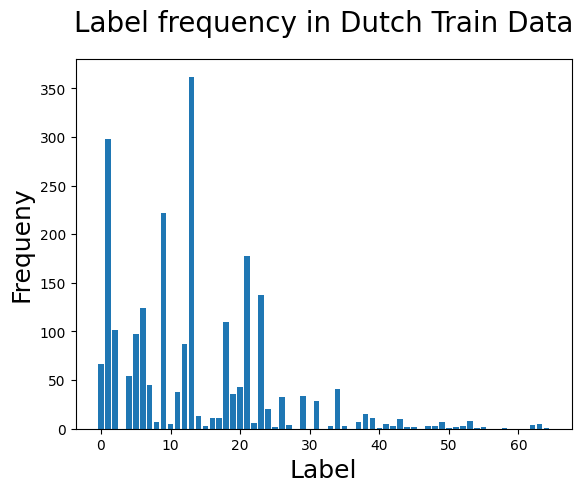

In [43]:
import matplotlib.pyplot as plt
keys = list(data.keys())
values = list(data.values())

plt.bar(keys, values)
plt.xlabel("Label",fontsize=18)
plt.ylabel("Frequeny",fontsize=18)
plt.title("Label frequency in Dutch Train Data",fontsize=20,pad=20)
plt.show()

In [10]:
def get_ids(tokens, tags):
    ids = []
    token = []
    ner_tags = []
    for i in range(0, len(tokens)):
        ids.append(i)
        token.append(tokens[i])
        ner_tags.append(tags[i])
    return ids, token, ner_tags

In [11]:
# To get it into the correct form: https://huggingface.co/docs/datasets/v1.1.1/loading_datasets.html

ids_train, tokens_train, ner_tags_train = get_ids(X_train, y_train)
ids_val, tokens_val, ner_tags_val = get_ids(X_val, y_val)

ids_test, tokens_test, ner_tags_test = get_ids(test_token, transformed_input_test)

train = {'input_ids': ids_train,
            'tokens': tokens_train,
            'ner_tags': ner_tags_train}

validation = {'input_ids': ids_val,
            'tokens': tokens_val,
            'ner_tags': ner_tags_val}

test = {'input_ids': ids_test,
            'tokens': tokens_test,
            'ner_tags': ner_tags_test}

train = Dataset.from_dict(train) 
validation = Dataset.from_dict(validation)
test = Dataset.from_dict(test)

data = {'train': train,
            'validation': validation,
            'test': test}

In [12]:
conll2003 = datasets.load_dataset("conll2003") 
conll2003

conll2003['train'] = data['train']
conll2003['validation'] = data['validation']
conll2003['test'] = data['test']

Found cached dataset conll2003 (/Users/julianbehrendt/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/9a4d16a94f8674ba3466315300359b0acd891b68b6c8743ddf60b9c702adce98)
100%|██████████| 3/3 [00:00<00:00, 178.94it/s]


In [13]:
conll2003

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'tokens', 'ner_tags'],
        num_rows: 376
    })
    validation: Dataset({
        features: ['input_ids', 'tokens', 'ner_tags'],
        num_rows: 162
    })
    test: Dataset({
        features: ['input_ids', 'tokens', 'ner_tags'],
        num_rows: 490
    })
})

In [14]:
def tokenize_and_align_labels(examples, label_all_tokens=True): 

    
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True) 

    
    labels = [] 
    for i, label in enumerate(examples["ner_tags"]): 
        word_ids = tokenized_inputs.word_ids(batch_index=i) 
        # word_ids() => Return a list mapping the tokens
        # to their actual word in the initial sentence.
        # It Returns a list indicating the word corresponding to each token. 
        
        previous_word_idx = None 
        label_ids = []
        # Special tokens like `<s>` and `<\s>` are originally mapped to None 
        # We need to set the label to -100 so they are automatically ignored in the loss function.
        
        for word_idx in word_ids: 
            if word_idx is None: 
                # set –100 as the label for these special tokens
                label_ids.append(-100)
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            elif word_idx != previous_word_idx:
                # if current word_idx is != prev then its the most regular case
                # and add the corresponding token                 
                label_ids.append(label[word_idx]) 
            else: 
                # to take care of sub-words which have the same word_idx
                # set -100 as well for them, but only if label_all_tokens == False
                label_ids.append(label[word_idx] if label_all_tokens else -100) 
                # mask the subword representations after the first subword
                 
            previous_word_idx = word_idx 
        labels.append(label_ids) 
    tokenized_inputs["labels"] = labels 
    return tokenized_inputs 

In [15]:
tokenized_datasets = conll2003.map(tokenize_and_align_labels, batched=True)

100%|██████████| 1/1 [00:00<00:00, 26.88ba/s]


In [16]:
model = AutoModelForTokenClassification.from_pretrained("bert-base-uncased", num_labels= 69)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

In [17]:
from transformers import TrainingArguments, Trainer 
args = TrainingArguments( 
    "test-ner",
    evaluation_strategy = "epoch", 
    learning_rate=2e-5, 
    per_device_train_batch_size=32, 
    per_device_eval_batch_size=32, 
    num_train_epochs=10, 
    weight_decay=0.01, 
    eval_steps = 100,  
    save_total_limit = 2
) 

In [18]:
data_collator = DataCollatorForTokenClassification(tokenizer) 

In [19]:
metric = datasets.load_metric("seqeval") 

In [20]:
def compute_metrics(eval_preds): 
    pred_logits, labels = eval_preds 
    
    pred_logits = np.argmax(pred_logits, axis=2) 
    print(pred_logits)
    # the logits and the probabilities are in the same order,
    # so we don’t need to apply the softmax
    
    predictions = []
    true_labels = []
    for i in range(len(pred_logits)):
        pred_seq = []
        true_seq = []
        for j in range(len(pred_logits[i])):
            if labels[i][j] != -100:
                pred_seq.append(pred_logits[i][j])
                true_seq.append(labels[i][j])
        predictions.append(pred_seq)
        true_labels.append(true_seq)
    
    results = metric.compute(predictions=predictions, references=true_labels) 
    return { 
   "precision": results["overall_precision"], 
   "recall": results["overall_recall"], 
   "f1": results["overall_f1"], 
  "accuracy": results["overall_accuracy"], 
  } 

In [21]:
trainer = Trainer( 
    model, 
    args, 
   train_dataset=tokenized_datasets["train"], 
   eval_dataset=tokenized_datasets["validation"], 
   data_collator=data_collator, 
   tokenizer=tokenizer, 
   compute_metrics=compute_metrics 
) 

In [29]:
trainer.train() 

The following columns in the training set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: tokens, ner_tags. If tokens, ner_tags are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 376
  Num Epochs = 10
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 120
  Number of trainable parameters = 108944709


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,1.872045,0.535939,0.544872,0.540369,0.585071
2,No log,1.872045,0.535939,0.544872,0.540369,0.585071
3,No log,1.872045,0.535939,0.544872,0.540369,0.585071
4,No log,1.872045,0.535939,0.544872,0.540369,0.585071
5,No log,1.872045,0.535939,0.544872,0.540369,0.585071


The following columns in the evaluation set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: tokens, ner_tags. If tokens, ner_tags are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 162
  Batch size = 32


[[13  5  6 ...  0  0  0]
 [13  5  5 ...  0  0  0]
 [13  9  9 ...  0  0  0]
 ...
 [13  5  5 ...  5  5  0]
 [13  9  2 ...  0  0  0]
 [13  5  5 ...  0  0  0]]


The following columns in the evaluation set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: tokens, ner_tags. If tokens, ner_tags are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 162
  Batch size = 32


[[13  5  6 ...  0  0  0]
 [13  5  5 ...  0  0  0]
 [13  9  9 ...  0  0  0]
 ...
 [13  5  5 ...  5  5  0]
 [13  9  2 ...  0  0  0]
 [13  5  5 ...  0  0  0]]


The following columns in the evaluation set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: tokens, ner_tags. If tokens, ner_tags are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 162
  Batch size = 32


[[13  5  6 ...  0  0  0]
 [13  5  5 ...  0  0  0]
 [13  9  9 ...  0  0  0]
 ...
 [13  5  5 ...  5  5  0]
 [13  9  2 ...  0  0  0]
 [13  5  5 ...  0  0  0]]


The following columns in the evaluation set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: tokens, ner_tags. If tokens, ner_tags are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 162
  Batch size = 32


[[13  5  6 ...  0  0  0]
 [13  5  5 ...  0  0  0]
 [13  9  9 ...  0  0  0]
 ...
 [13  5  5 ...  5  5  0]
 [13  9  2 ...  0  0  0]
 [13  5  5 ...  0  0  0]]


The following columns in the evaluation set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: tokens, ner_tags. If tokens, ner_tags are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 162
  Batch size = 32


[[13  5  6 ...  0  0  0]
 [13  5  5 ...  0  0  0]
 [13  9  9 ...  0  0  0]
 ...
 [13  5  5 ...  5  5  0]
 [13  9  2 ...  0  0  0]
 [13  5  5 ...  0  0  0]]


KeyboardInterrupt: 

In [30]:
model.save_pretrained("bert_nl")

Configuration saved in bert_nl/config.json
Model weights saved in bert_nl/pytorch_model.bin


In [31]:
model_fine_tuned_nl = AutoModelForTokenClassification.from_pretrained("bert_nl")

loading configuration file bert_nl/config.json
Model config BertConfig {
  "_name_or_path": "bert_nl",
  "architectures": [
    "BertForTokenClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",
    "16": "LABEL_16",
    "17": "LABEL_17",
    "18": "LABEL_18",
    "19": "LABEL_19",
    "20": "LABEL_20",
    "21": "LABEL_21",
    "22": "LABEL_22",
    "23": "LABEL_23",
    "24": "LABEL_24",
    "25": "LABEL_25",
    "26": "LABEL_26",
    "27": "LABEL_27",
    "28": "LABEL_28",
    "29": "LABEL_29",
  

# Prediction of Test Set

In [32]:
from transformers import pipeline
import re
len_test = 490

In [33]:
nlp = pipeline("ner", model= model_fine_tuned_nl, tokenizer=tokenizer)

all_true_labels = []
all_prediction_labels = []
for i in range(0,len_test):
    test_data = conll2003['test'][i] 
    
    true_labels = test_data['ner_tags']
    all_true_labels.append(true_labels)
    
    tokens = test_data['tokens']
    ner_predictions = nlp(tokens)
    
    prediction_labels = []
    for i in range(0, len(ner_predictions)):
        x = ner_predictions[i]
        s = x[0]
        string = s['entity']
        label = int(re.search(r'\d+', string).group())
        prediction_labels.append(label)
    
    
    all_prediction_labels.append(prediction_labels)

In [34]:
results = metric.compute(predictions=all_prediction_labels, references=all_true_labels) 

In [35]:
all_true_labels_as_array = []
for i in range(0, len(all_true_labels)):
    sentence_labels = all_true_labels[i]
    for j in range(0,len(sentence_labels)):
        all_true_labels_as_array.append(sentence_labels[j])

all_predicted_labels_as_array = []
for i in range(0, len(all_prediction_labels)):
    sentence_labels = all_prediction_labels[i]
    for j in range(0,len(sentence_labels)):
        all_predicted_labels_as_array.append(sentence_labels[j])
        
from sklearn.metrics import accuracy_score
accuracy_score(all_true_labels_as_array,all_predicted_labels_as_array)

0.5201046093494606